In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




In [38]:
data = pd.read_csv('spam.csv', encoding='latin1')


In [39]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [40]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [41]:

data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [42]:
data = data.rename(columns={'v1': 'label', 'v2': 'message'})[['label', 'message']]
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [43]:
data=data[["message","label"]]

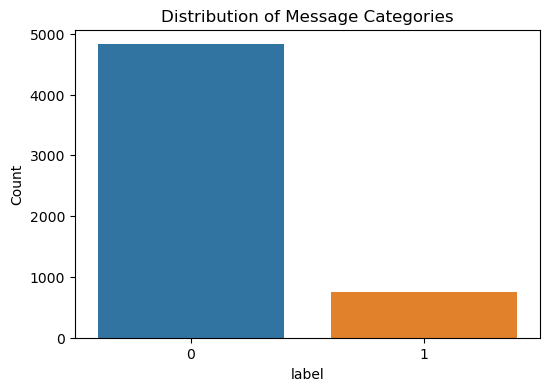

In [55]:
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Message Categories')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [44]:
# Preprocess the text data (e.g., TF-IDF Vectorization)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])
y=data["label"]

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=data['label'])



In [46]:
# Train Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)
logistic_pred = logistic_model.predict(X_test_tfidf)
logistic_results = {
    'accuracy': accuracy_score(y_test, logistic_pred),
    'precision': precision_score(y_test, logistic_pred),
    'recall': recall_score(y_test, logistic_pred),
    'f1_score': f1_score(y_test, logistic_pred)
}



In [47]:
# Train Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)
naive_bayes_pred = naive_bayes_model.predict(X_test_tfidf)
naive_bayes_results = {
    'accuracy': accuracy_score(y_test, naive_bayes_pred),
    'precision': precision_score(y_test, naive_bayes_pred),
    'recall': recall_score(y_test, naive_bayes_pred),
    'f1_score': f1_score(y_test, naive_bayes_pred)
}



In [48]:
# Train Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
svm_results = {
    'accuracy': accuracy_score(y_test, svm_pred),
    'precision': precision_score(y_test, svm_pred),
    'recall': recall_score(y_test, svm_pred),
    'f1_score': f1_score(y_test, svm_pred)
}



In [49]:
# Train Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_tfidf, y_train)
random_forest_pred = random_forest_model.predict(X_test_tfidf)
random_forest_results = {
    'accuracy': accuracy_score(y_test, random_forest_pred),
    'precision': precision_score(y_test, random_forest_pred),
    'recall': recall_score(y_test, random_forest_pred),
    'f1_score': f1_score(y_test, random_forest_pred)
}



In [50]:
# Tokenize and pad sequences for LSTM
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['message'])
sequences = tokenizer.texts_to_sequences(data['message'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    padded_sequences, data['label'], test_size=0.2, random_state=42, stratify=data['label']
)



In [51]:
# Build LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

lstm_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()
lstm_results = {
    'accuracy': accuracy_score(y_test_lstm, lstm_pred),
    'precision': precision_score(y_test_lstm, lstm_pred),
    'recall': recall_score(y_test_lstm, lstm_pred),
    'f1_score': f1_score(y_test_lstm, lstm_pred)
}



Epoch 1/5


c:\Users\suppa\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.8808 - loss: 0.2867 - val_accuracy: 0.9821 - val_loss: 0.0788
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9889 - loss: 0.0435 - val_accuracy: 0.9794 - val_loss: 0.0543
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.9950 - loss: 0.0196 - val_accuracy: 0.9857 - val_loss: 0.0554
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9988 - loss: 0.0093 - val_accuracy: 0.9848 - val_loss: 0.0554
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9996 - loss: 0.0033 - val_accuracy: 0.9874 - val_loss: 0.0593
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [52]:
# Results
evaluation_results = {
    'Logistic Regression': logistic_results,
    'Naive Bayes': naive_bayes_results,
    'Support Vector Machine': svm_results,
    'Random Forest': random_forest_results,
    'LSTM': lstm_results
}

evaluation_results


{'Logistic Regression': {'accuracy': 0.968609865470852,
  'precision': 0.9913793103448276,
  'recall': 0.7718120805369127,
  'f1_score': 0.8679245283018869},
 'Naive Bayes': {'accuracy': 0.9704035874439462,
  'precision': 0.9915254237288136,
  'recall': 0.785234899328859,
  'f1_score': 0.8764044943820225},
 'Support Vector Machine': {'accuracy': 0.9775784753363229,
  'precision': 0.984375,
  'recall': 0.8456375838926175,
  'f1_score': 0.9097472924187726},
 'Random Forest': {'accuracy': 0.9730941704035875,
  'precision': 1.0,
  'recall': 0.7986577181208053,
  'f1_score': 0.8880597014925372},
 'LSTM': {'accuracy': 0.9874439461883409,
  'precision': 0.9927007299270073,
  'recall': 0.912751677852349,
  'f1_score': 0.951048951048951}}